In [1]:
# Importing Libraries

import tensorflow as tf; print(tf.__version__)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

2.6.0


In [2]:
# Download Dataset and Split into train and test
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [5]:
# Normalizing Train and Test Images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_images, train_labels = train_images / 255.0, to_categorical(train_labels)
test_images, test_labels = test_images / 255.0, to_categorical(test_labels)

In [6]:
def cnn_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer = 'he_uniform'))
  model.add(Dense(10, 'softmax'))
  return model

In [7]:
optimizer = 'adam'
model = cnn_model()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

validation_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    verbose=1,
    mode="auto",
    patience = 5,
    baseline=None,
    restore_best_weights=True,
)

history = model.fit(train_images, train_labels,
                     epochs=50, batch_size=512,
                     verbose=1, callbacks = [validation_callback], validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 37s 65ms/step - loss: 0.8153 - accuracy: 0.6981 - val_loss: 0.4936 - val_accuracy: 0.8243
Epoch 2/50
94/94 [==============================] - 5s 56ms/step - loss: 0.4814 - accuracy: 0.8245 - val_loss: 0.3991 - val_accuracy: 0.8588
Epoch 3/50
94/94 [==============================] - 5s 55ms/step - loss: 0.4176 - accuracy: 0.8490 - val_loss: 0.3671 - val_accuracy: 0.8717
Epoch 4/50
94/94 [==============================] - 5s 55ms/step - loss: 0.3745 - accuracy: 0.8644 - val_loss: 0.3365 - val_accuracy: 0.8792
Epoch 5/50
94/94 [==============================] - 5s 57ms/step - loss: 0.3479 - accuracy: 0.8729 - val_loss: 0.3130 - val_accuracy: 0.8888
Epoch 6/50
94/94 [==============================] - 5s 56ms/step - loss: 0.3243 - accuracy: 0.8807 - val_loss: 0.3169 - val_accuracy: 0.8831
Epoch 7/50
94/94 [==============================] - 5s 56ms/step - loss: 0.3083 - accuracy: 0.8887 - val_loss: 0.2797 - val_accuracy: 0.9009
Epoch 8/50
9

In [8]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_loss, test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.2020 - accuracy: 0.9279
0.20203310251235962 0.9279000163078308


In [15]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

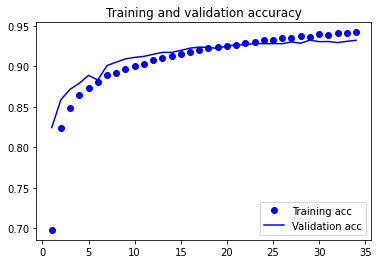

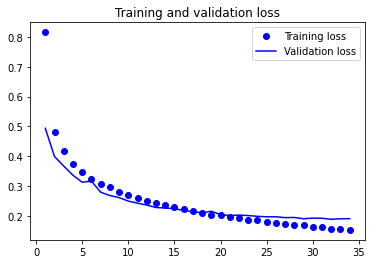

In [16]:
plot_accuracy_and_loss(history)

In [17]:
model.save("fashion_mnist_cnn")

INFO:tensorflow:Assets written to: fashion_mnist_cnn/assets


In [ ]:
!zip -r /content/models.zip /content/models
from google.colab import files
files.download("/content/models.zip")

  adding: content/models/ (stored 0%)
  adding: content/models/fashion_mnist_cnn/ (stored 0%)
  adding: content/models/fashion_mnist_cnn/variables/ (stored 0%)
  adding: content/models/fashion_mnist_cnn/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/models/fashion_mnist_cnn/variables/variables.index (deflated 66%)
  adding: content/models/fashion_mnist_cnn/saved_model.pb (deflated 89%)
  adding: content/models/fashion_mnist_cnn/keras_metadata.pb (deflated 91%)
  adding: content/models/fashion_mnist_cnn/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>